In [1]:
!pip install seaborn

In [2]:
import pandas as pd

In [12]:
df = pd.read_csv('cases_features.csv')
group_by_deaths = df.groupby(['countriesAndTerritories']).sum()['deaths']
bad_countries = list(group_by_deaths[group_by_deaths>1000].index)
df = df[df['countriesAndTerritories'].isin(bad_countries)]
country_names = df['countriesAndTerritories'].unique()
country_names

array(['Belgium', 'Brazil', 'Canada', 'China', 'France', 'Germany',
       'Iran', 'Italy', 'Mexico', 'Netherlands', 'Spain', 'Sweden',
       'Switzerland', 'United_Kingdom', 'United_States_of_America',
       'Turkey'], dtype=object)

In [4]:
import seaborn as sns

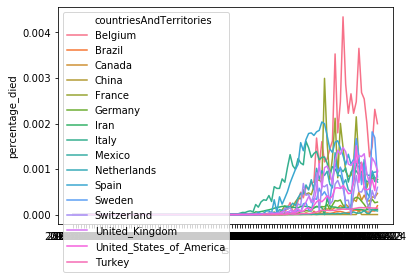

In [5]:
sns.lineplot(x='ts', y='percentage_died', data=df, hue='countriesAndTerritories')

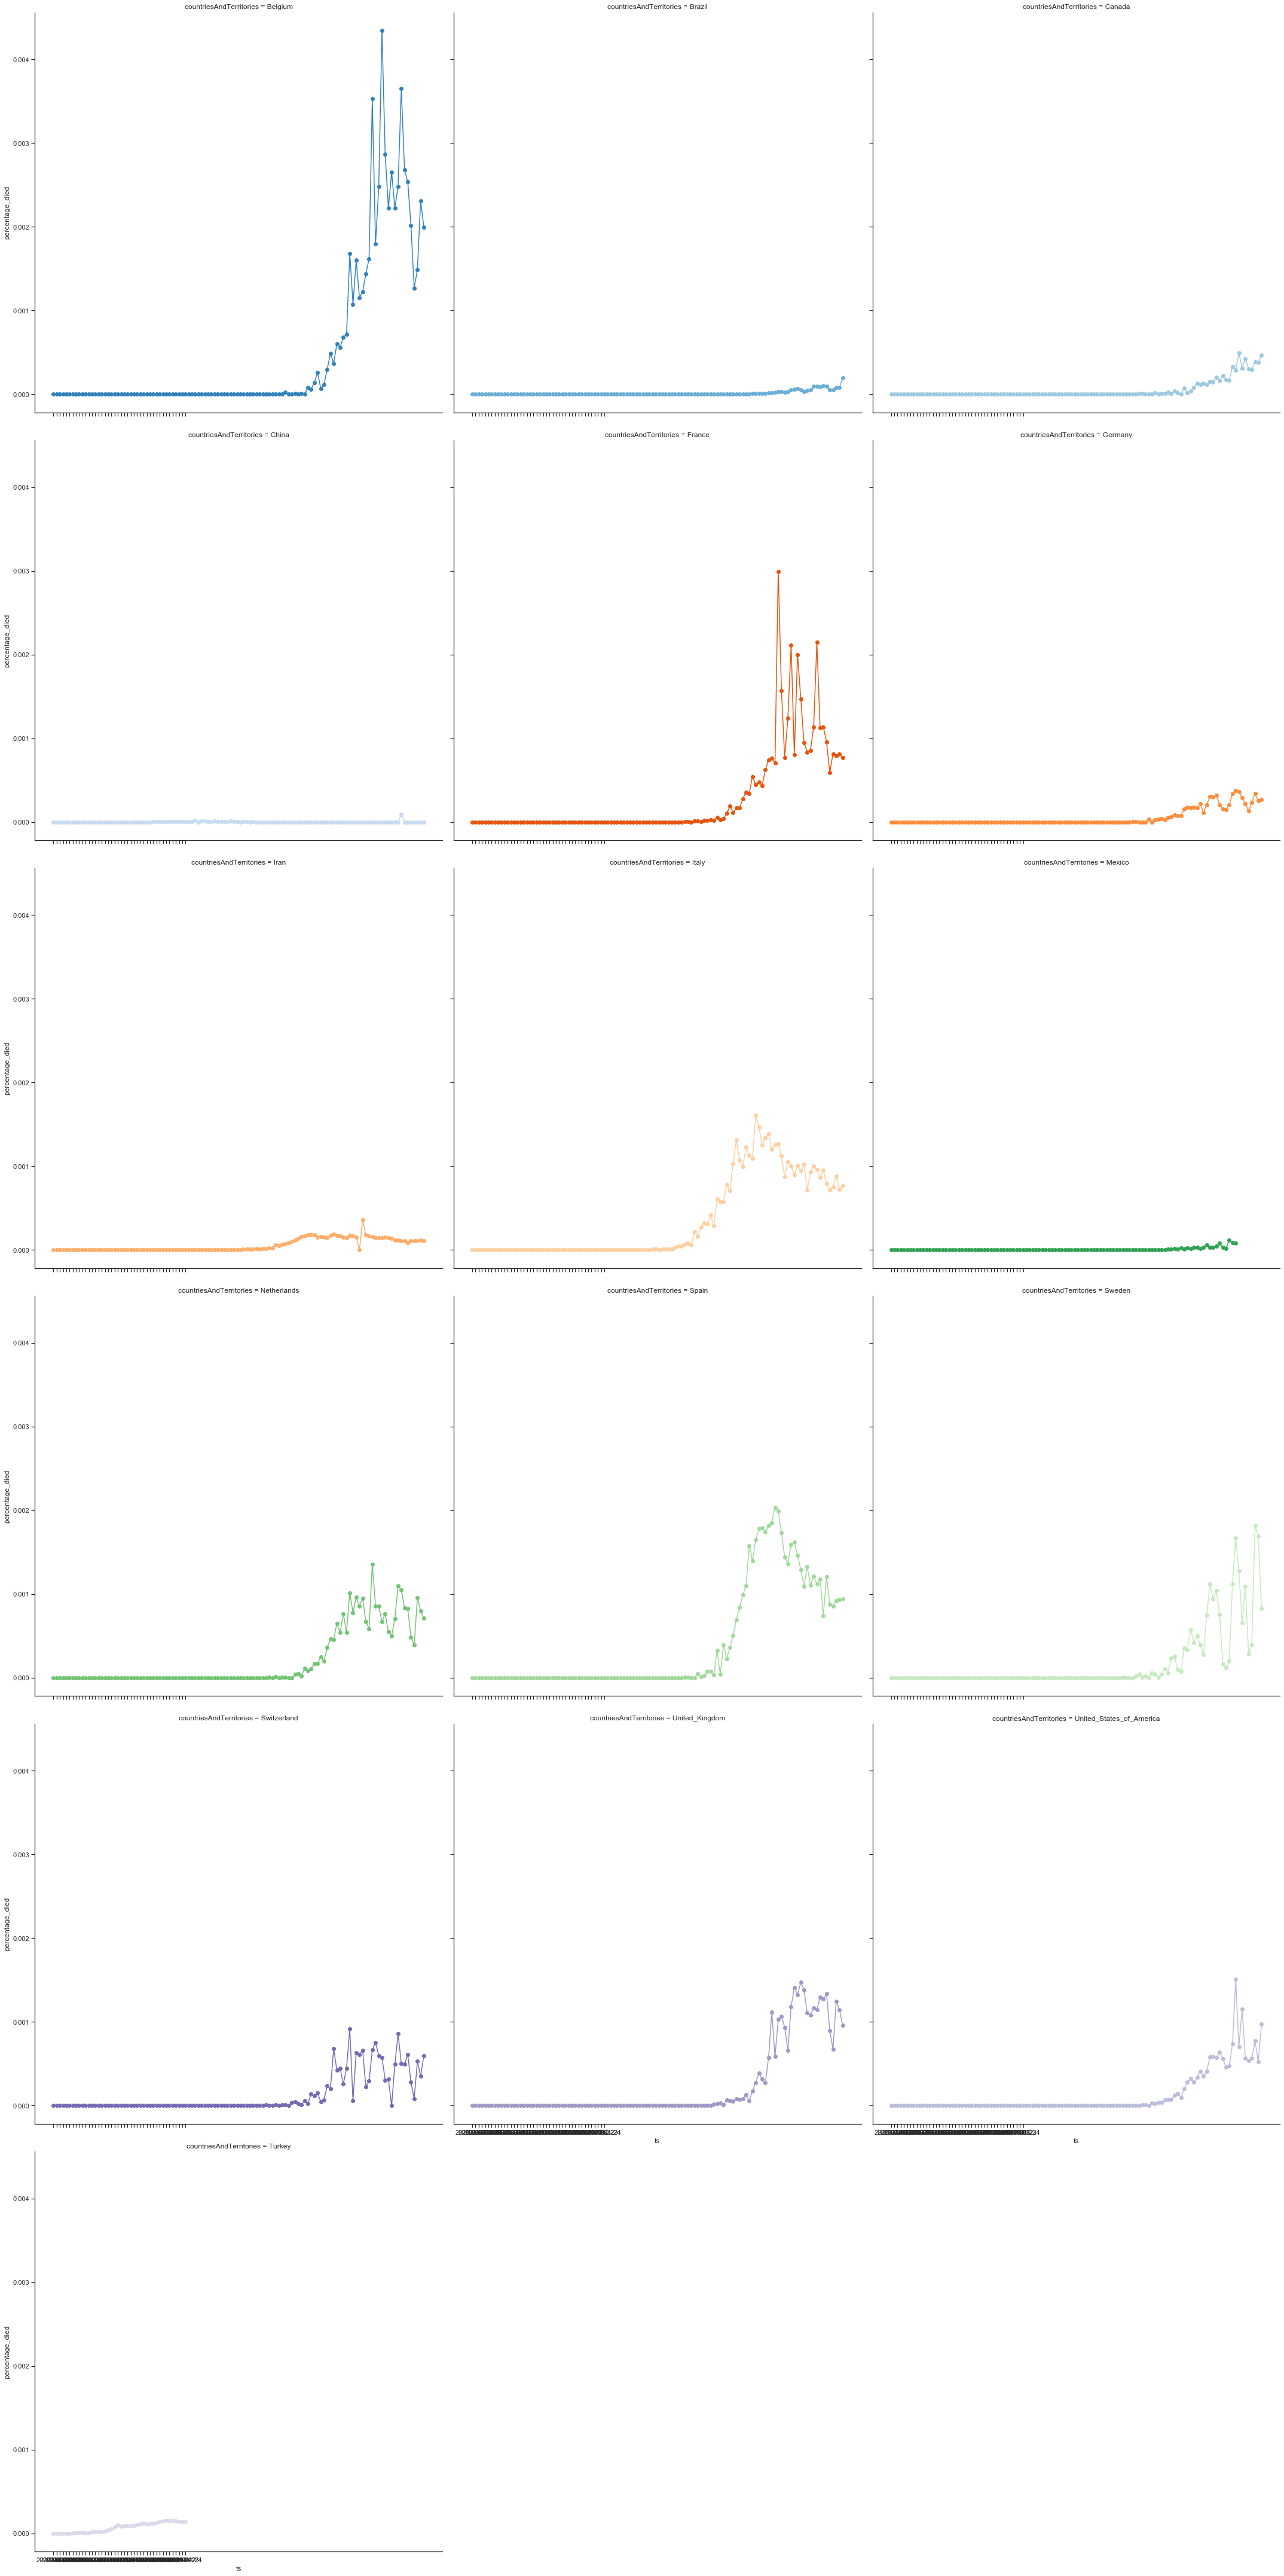

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")



# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="countriesAndTerritories", hue="countriesAndTerritories", palette="tab20c",
                     col_wrap=3, height=10)

grid.map(plt.plot, "ts", "percentage_died", marker="o")

In [15]:
df_cumsum = None

for country_name in country_names:
    df_country = df[df['countriesAndTerritories']==country_name]
    df_country['total_percentage_infected'] = df_country['percentage_infected'].cumsum()
    if df_cumsum is None:
        df_cumsum = df_country
    else:
        df_cumsum = pd.concat([df_cumsum,df_country], ignore_index=False)
    

/Users/romeokienzler/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


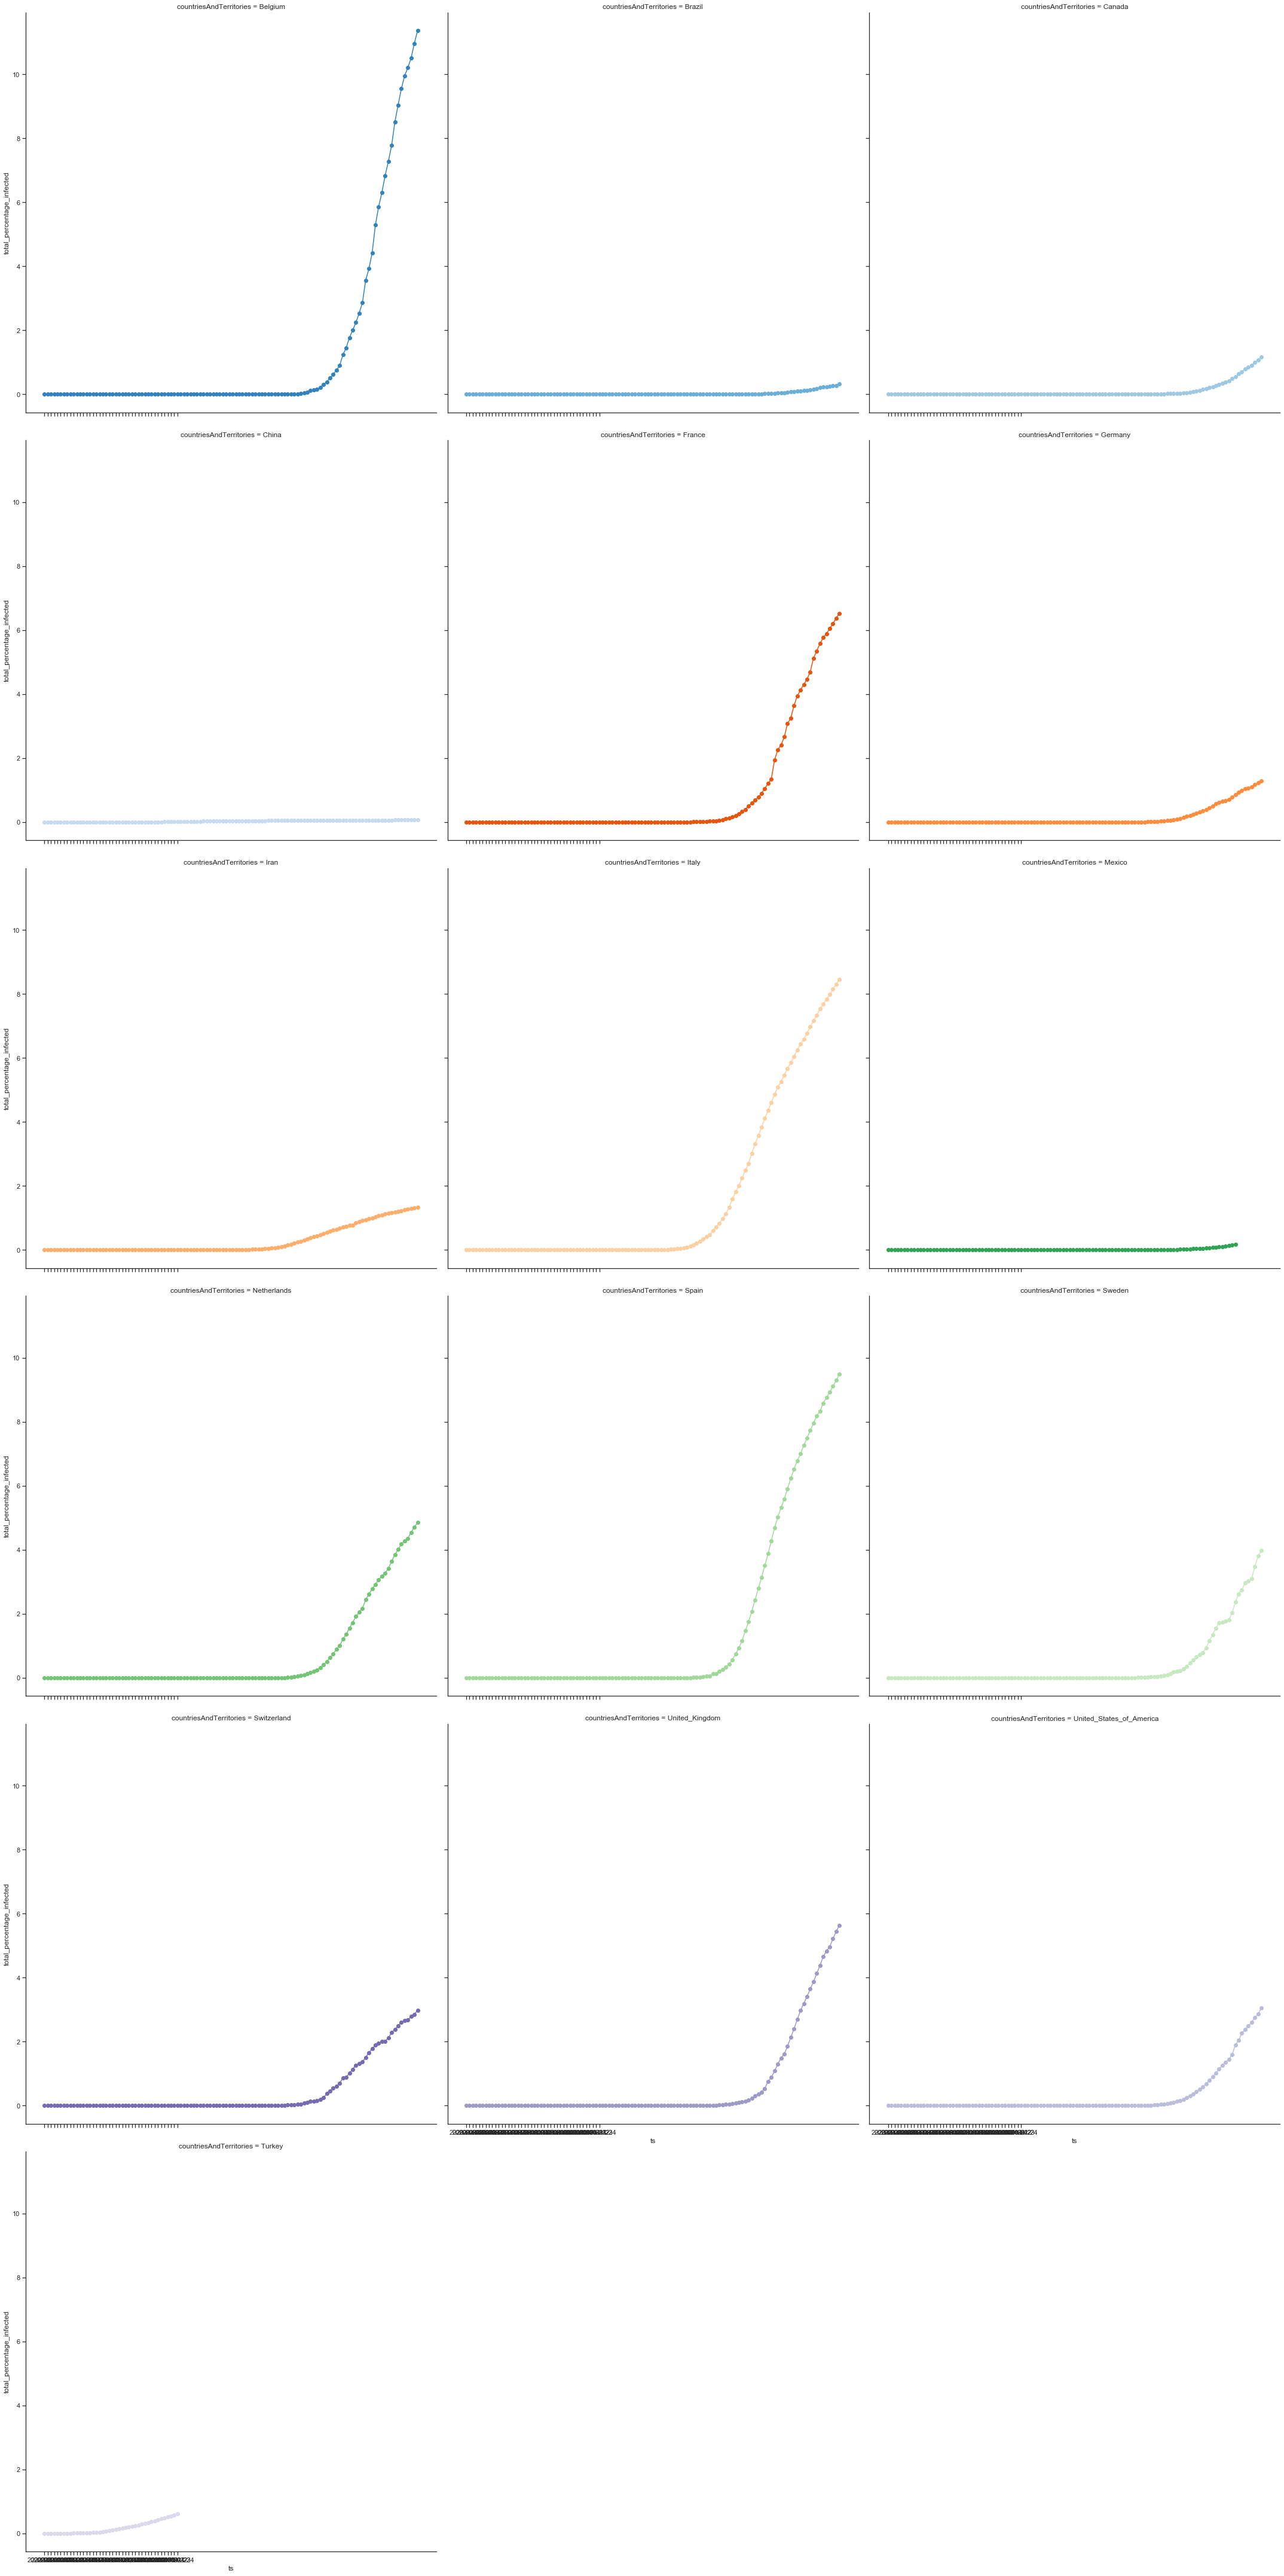

In [17]:
sns.set(style="ticks")



# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df_cumsum, col="countriesAndTerritories", hue="countriesAndTerritories", palette="tab20c",
                     col_wrap=3, height=10)
grid.map(plt.plot, "ts", "total_percentage_infected", marker="o")